In [178]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
import nltk
from pprint import pprint
from glob import iglob

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)


In [148]:
booksdata = []

for i,filename in enumerate(iglob('*.epub')):
    print(filename)
    book = epub.read_epub(filename)
    
    bookdata = {
        'filename': filename,
        'title': book.title,
        'chapters': [],
    }

    chaptername2personfreq = {}
    for j,item in enumerate(book.get_items_of_type(ebooklib.ITEM_DOCUMENT)):
        bs = BeautifulSoup(item.content)

        ## skip non-chapters
        if len(bs.text) < 5000:
            continue
            
        ## heuristic bto find chapter name
        chapter_name = None
        for line in list(bs.strings)[4:15]:
            line = line.strip()
            if not line:
                continue
            if '{' in line:
                ## skip CSS
                continue
            if line:
                chapter_name = line
                ## HACK
                if line.startswith('What was about to happen was no secret.'):
                    chapter_name = 'Inigo’s Eleventh Dream'
                break

        print('\t', chapter_name)
        
        tokens = nltk.word_tokenize(bs.text)
        tagged = nltk.pos_tag(tokens)
        entities = nltk.chunk.ne_chunk(tagged)

        persons = []
        for tag,ne_name in entities.pos():
            if ne_name == 'PERSON':
                person = tag[0]
                persons.append(person)

        fdist = FreqDist(persons)
        
        chapterdata = {
            'name': chapter_name,
            'tokens': tokens,
            'tagged': tagged,
            'entities': entities,
            'text': bs.text,
            'persons': persons,
            'persons_fdist': fdist,
        }
    
        bookdata['chapters'].append(chapterdata)
            
    booksdata.append(bookdata)

2 - Temporal Void, The - Peter F. Hamilton.epub
	 1
	 Inigo’s Eighth Dream
	 2
	 Inigo’s Ninth Dream
	 3
	 Justine
	 Inigo’s Tenth Dream
	 4
	 Inigo’s Eleventh Dream
	 Inigo’s Eleventh Dream
	 Justine: Year Three
	 5
	 Inigo’s Twelfth Dream
	 Justine: Year Four
	 Inigo’s Thirteenth Dream
1 - Dreaming Void, The - Peter F. Hamilton.epub
	 Prologue
	 1
	 Inigo’s first dream
	 2
	 Inigo’s second dream
	 3
	 Inigo’s third dream
	 4
	 Inigo’s fourth dream
	 5
	 Inigo’s fifth dream
	 6
	 Inigo’s sixth dream
	 7
	 Inigo’s seventh dream
3 - Evolutionary Void, The - Peter F. Hamilton.epub
	 ONE
	 Justine: Year Three Reset
	 TWO
	 Inigo’s Sixteenth Dream
	 THREE
	 FOUR
	 Inigo’s Twenty-sixth Dream
	 FIVE
	 Inigo’s Twenty-ninth Dream
	 SIX
	 Inigo’s Thirty-third Dream
	 SEVEN
	 Inigo’s Forty-seventh Dream: The Waterwalker’s Triumph
	 EIGHT
	 Inigo’s Last Dream
	 NINE
	 Justine Year Forty-five
	 TEN
	 Justine Year Forty-five, Day Thirty-one
	 ELEVEN
	 TWELVE


In [149]:
for bookdata in booksdata:
    title = bookdata['title']
    
    for chapterdata in bookdata['chapters']:
        print(title, chapterdata['name'], chapterdata['persons_fdist'].most_common(5))

The Temporal Void 1 [('Troblum', 103), ('Paula', 65), ('Stubsy', 43), ('Florac', 20), ('Araminta', 19)]
The Temporal Void Inigo’s Eighth Dream [('Edeard', 179), ('Ivarl', 43), ('Macsen', 33), ('Kanseen', 20), ('Boyd', 18)]
The Temporal Void 2 [('Oscar', 32), ('Tomansio', 28), ('Araminta', 26), ('Justine', 24), ('Inigo', 24)]
The Temporal Void Inigo’s Ninth Dream [('Edeard', 350), ('Macsen', 80), ('Kanseen', 67), ('Dinlay', 65), ('Ivarl', 48)]
The Temporal Void 3 [('Oscar', 27), ('Kazimir', 26), ('Araminta', 25), ('Troblum', 22), ('Paula', 22)]
The Temporal Void Justine [('Justine', 7), ('Okay', 2), ('Exoimages', 1), ('Status', 1), ('Stars', 1)]
The Temporal Void Inigo’s Tenth Dream [('Edeard', 287), ('Kristabel', 87), ('Macsen', 35), ('Kanseen', 34), ('Medath', 33)]
The Temporal Void 4 [('Inigo', 30), ('Araminta', 30), ('Marius', 28), ('Ethan', 20), ('Oscar', 17)]
The Temporal Void Inigo’s Eleventh Dream [('Edeard', 260), ('Kristabel', 47), ('Dinlay', 37), ('Master', 35), ('Finitan', 3

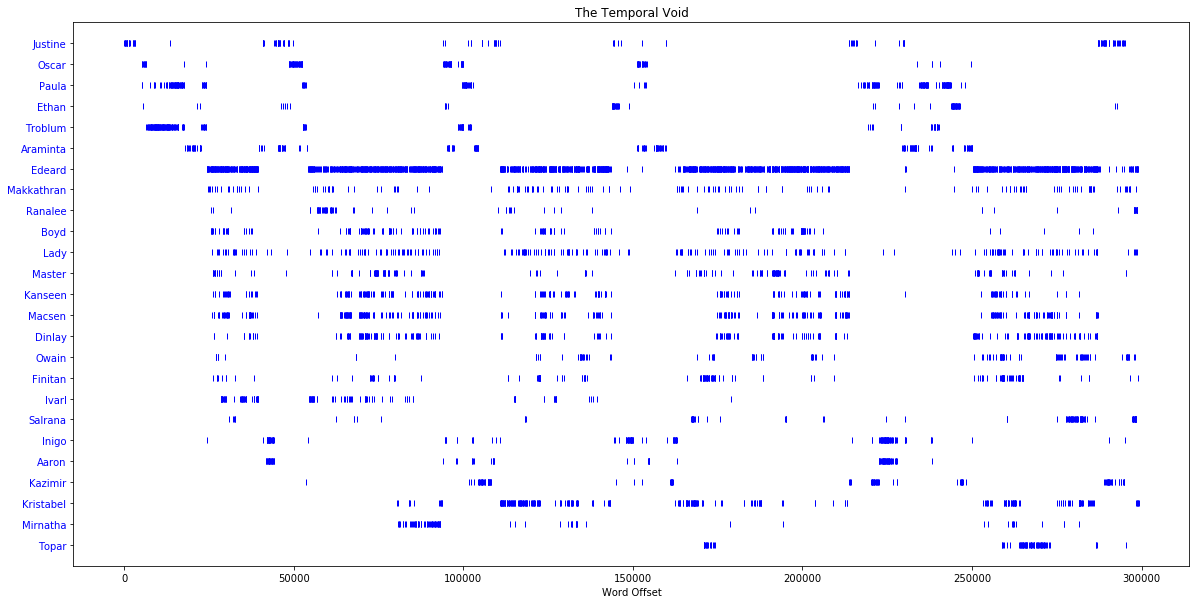

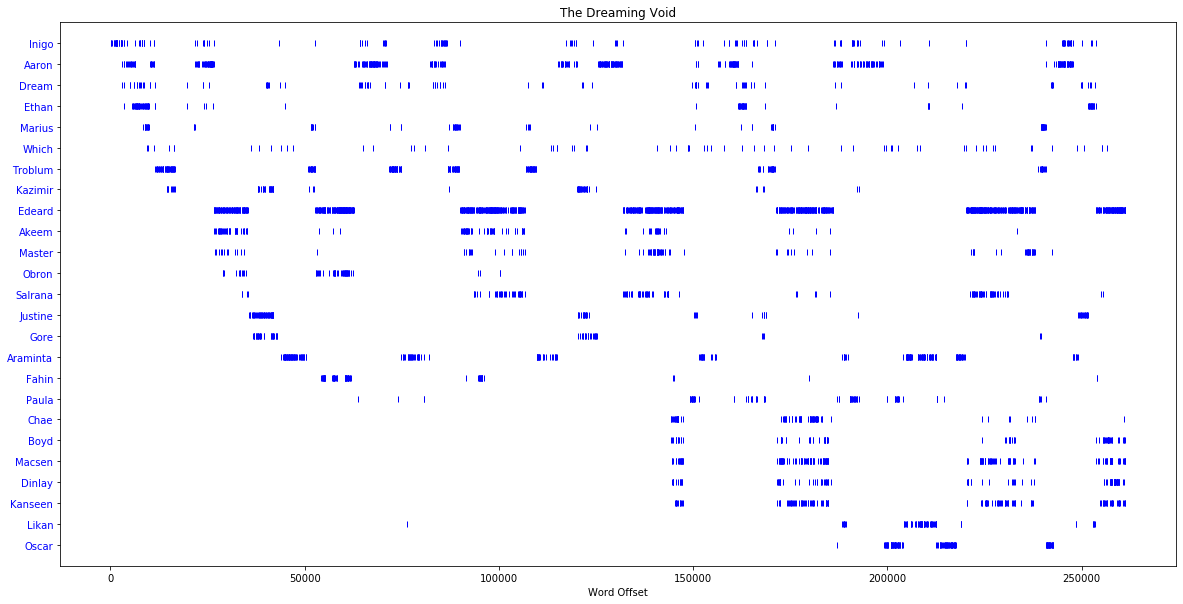

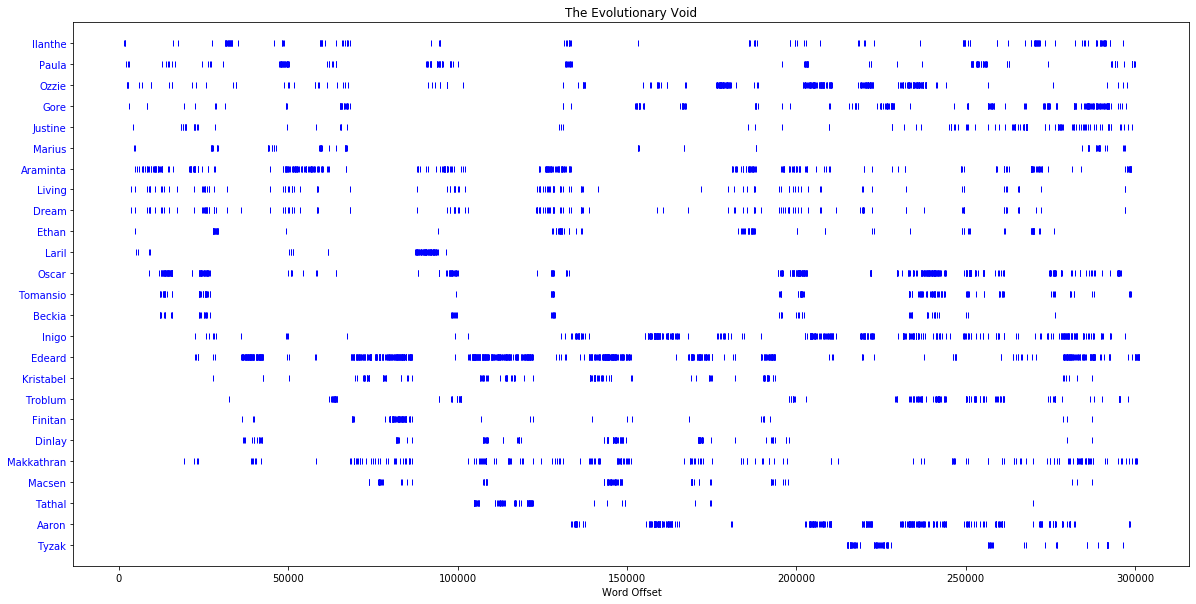

In [179]:
for bookdata in booksdata:
    title = bookdata['title']
    
    tokens_book = []
    freqs_book = FreqDist()
    names_book_inchapterorder = []
    
    for chapterdata in bookdata['chapters']:
        tokens_book += chapterdata['tokens']
        freqs_book += chapterdata['persons_fdist']
        names_book_inchapterorder += chapterdata['persons']
        
    n = 25
    names = []
    mcn = [name for name,_ in freqs_book.most_common(n)]
    for i,name in enumerate(names_book_inchapterorder):
        if name in mcn and name not in names:
            names.append(name)
            if len(names) > n:
                break
        
    nltk.draw.dispersion_plot(tokens_book, names, title=title)
    